<a href="https://colab.research.google.com/github/Dh0t/Tugas/blob/main/BigDataptm9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [15]:
# Import necessary modules from scikit-learn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# %%
# Membuat dataset sintetis dengan dua kelas
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat dan melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan data uji
y_pred = model.predict(X_test)

# Menghitung dan menampilkan metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil akurasi dan metrik lainnya
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Menghitung dan menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Akurasi Model: 85.00%
Precision: 0.88
Recall: 0.83
F1-Score: 0.85
Confusion Matrix:
[[127  18]
 [ 27 128]]


In [16]:
train = '/content/smartphone_cleaned_v5.csv'

In [7]:
df = pd.read_csv(train)
print(df.head(10))

  brand_name                                    model  price  rating  has_5g  \
0    oneplus                            OnePlus 11 5G  54999    89.0    True   
1    oneplus                OnePlus Nord CE 2 Lite 5G  19989    81.0    True   
2    samsung                    Samsung Galaxy A14 5G  16499    75.0    True   
3   motorola                     Motorola Moto G62 5G  14999    81.0    True   
4     realme                       Realme 10 Pro Plus  24999    82.0    True   
5    samsung  Samsung Galaxy F23 5G (6GB RAM + 128GB)  16999    80.0    True   
6      apple                          Apple iPhone 14  65999    81.0    True   
7     xiaomi            Xiaomi Redmi Note 12 Pro Plus  29999    86.0    True   
8    nothing                          Nothing Phone 1  26749    85.0    True   
9    oneplus                       OnePlus Nord 2T 5G  28999    84.0    True   

   has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0     True           False      snapdrag

In [8]:
print(df.dtypes)

brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
resolution                    object
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
dtype: object


In [9]:
df.head(10)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,6.60,120,1080 x 2408,3,1.0,android,50.0,8.0,1,1024.0
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,6.10,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,NaN
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,dimensity,8.0,2.60,...,6.67,120,1080 x 2400,3,1.0,android,200.0,16.0,0,NaN
8,nothing,Nothing Phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.50,...,6.55,120,1080 x 2400,2,1.0,android,50.0,16.0,0,NaN
9,oneplus,OnePlus Nord 2T 5G,28999,84.0,True,True,False,dimensity,8.0,3.00,...,6.43,90,1080 x 2400,3,1.0,android,50.0,32.0,0,NaN


Confusion Matrix:
[[127  18]
 [ 27 128]]


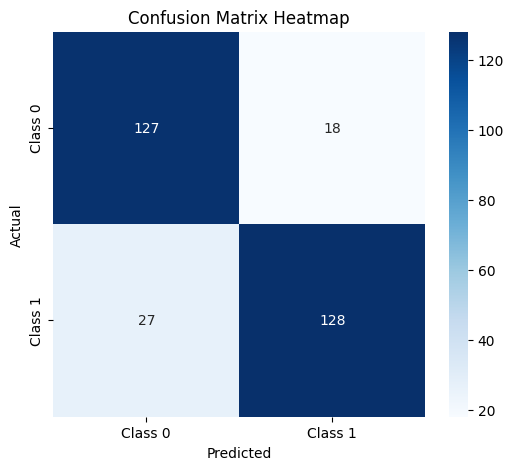

In [11]:
# %%
# Menghitung dan menampilkan Confusion Matrix (kode ini sudah ada)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Membuat heatmap untuk Confusion Matrix
plt.figure(figsize=(6, 5)) # Mengatur ukuran figure
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# annot=True untuk menampilkan nilai di setiap sel
# fmt='d' untuk memformat nilai sebagai integer
# cmap='Blues' untuk menggunakan colormap biru
# xticklabels dan yticklabels untuk memberi label pada sumbu x dan y

plt.title('Confusion Matrix Heatmap') # Menambahkan judul
plt.xlabel('Predicted') # Menambahkan label sumbu x
plt.ylabel('Actual') # Menambahkan label sumbu y
plt.show() # Menampilkan plot

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')


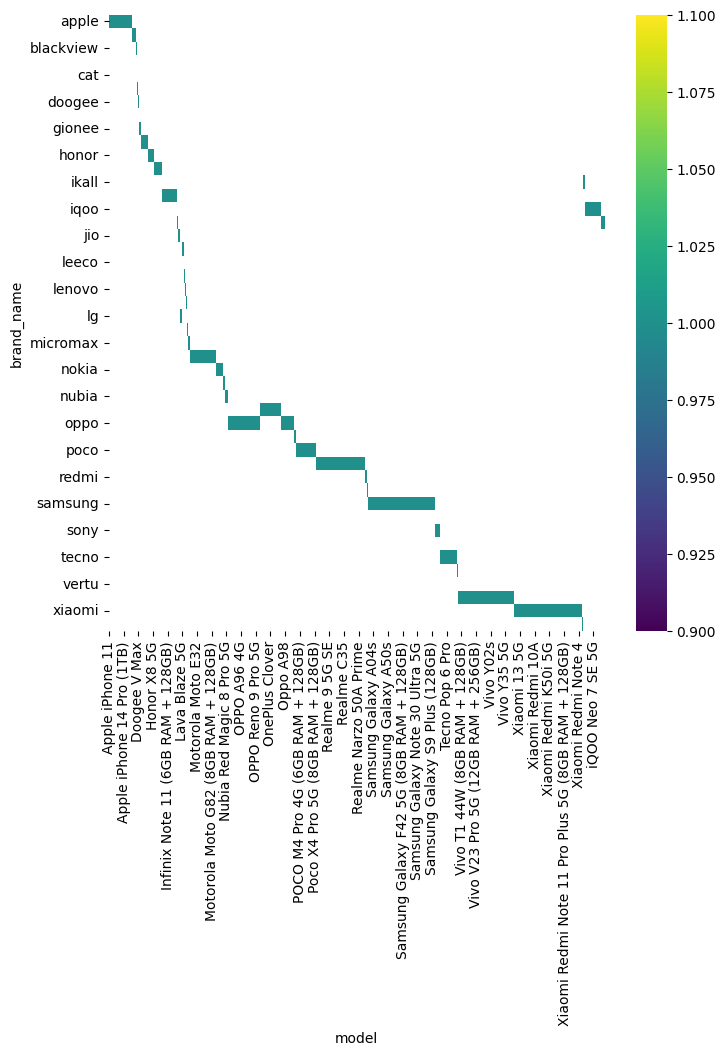

In [23]:
# @title Operating System vs Operating System Version

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Print the column names to check for the correct 'Operating System' column name
print(df.columns) # Uncomment this line to see the column names

plt.subplots(figsize=(8, 8))
# Replace 'Operating System' with the correct column name from your DataFrame
df_2dhist = pd.DataFrame({
    x_label: grp['brand_name'].value_counts()
    # Replace 'OS' with the actual column name for the Operating System, likely 'Operating System'
    for x_label, grp in df.groupby('model')
})
sns.heatmap(df_2dhist, cmap='viridis')
# Update this label to match the column name
plt.xlabel('model')
_ = plt.ylabel('brand_name')

In [24]:
columns_with_whitespace = df.columns[df.columns.str.contains('^\s+|\s+$', regex=True)]
print("Columns with empty leading and trailing whitespaces:", columns_with_whitespace)

Columns with empty leading and trailing whitespaces: Index([], dtype='object')


In [25]:
df = df.replace(r'^\s*$', np.nan, regex=True);

In [26]:
print("Data types of columns after Cleanup:")
print(df.head(5))

Data types of columns after Cleanup:
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   screen_size  refresh_rate    resolution  num_rear_cameras  \
0         6.70           12

In [30]:
headers = ['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto']
print("headers\n", headers)

headers
 ['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'resolution', 'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto']


In [55]:
df.columns = headers
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [56]:
print(df.isnull().any())

brand_name                   False
model                        False
price                        False
rating                        True
has_5g                       False
has_nfc                      False
has_ir_blaster               False
processor_brand               True
num_cores                     True
processor_speed               True
battery_capacity              True
fast_charging_available      False
fast_charging                 True
ram_capacity                 False
internal_memory              False
screen_size                  False
refresh_rate                 False
resolution                   False
num_rear_cameras             False
num_front_cameras             True
os                            True
primary_camera_rear          False
primary_camera_front          True
extended_memory_available    False
extended_upto                 True
dtype: bool


In [57]:
print(df.replace(r'^\s*$', np.nan, regex=True))

    brand_name                            model  price  rating  has_5g  \
0      oneplus                    OnePlus 11 5G  54999    89.0    True   
1      oneplus        OnePlus Nord CE 2 Lite 5G  19989    81.0    True   
2      samsung            Samsung Galaxy A14 5G  16499    75.0    True   
3     motorola             Motorola Moto G62 5G  14999    81.0    True   
4       realme               Realme 10 Pro Plus  24999    82.0    True   
..         ...                              ...    ...     ...     ...   
975   motorola       Motorola Moto Edge S30 Pro  34990    83.0    True   
976      honor                      Honor X8 5G  14990    75.0    True   
977       poco  POCO X4 GT 5G (8GB RAM + 256GB)  28990    85.0    True   
978   motorola             Motorola Moto G91 5G  19990    80.0    True   
979    samsung           Samsung Galaxy M52s 5G  24990    74.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0       True           False  

In [58]:
print(df.describe(include='all'))

       brand_name                   model          price      rating has_5g  \
count         980                     980     980.000000  879.000000    980   
unique         46                     980            NaN         NaN      2   
top        xiaomi  Samsung Galaxy M52s 5G            NaN         NaN   True   
freq          134                       1            NaN         NaN    549   
mean          NaN                     NaN   32520.504082   78.258248    NaN   
std           NaN                     NaN   39531.812669    7.402854    NaN   
min           NaN                     NaN    3499.000000   60.000000    NaN   
25%           NaN                     NaN   12999.000000   74.000000    NaN   
50%           NaN                     NaN   19994.500000   80.000000    NaN   
75%           NaN                     NaN   35491.500000   84.000000    NaN   
max           NaN                     NaN  650000.000000   89.000000    NaN   

       has_nfc has_ir_blaster processor_brand   num

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


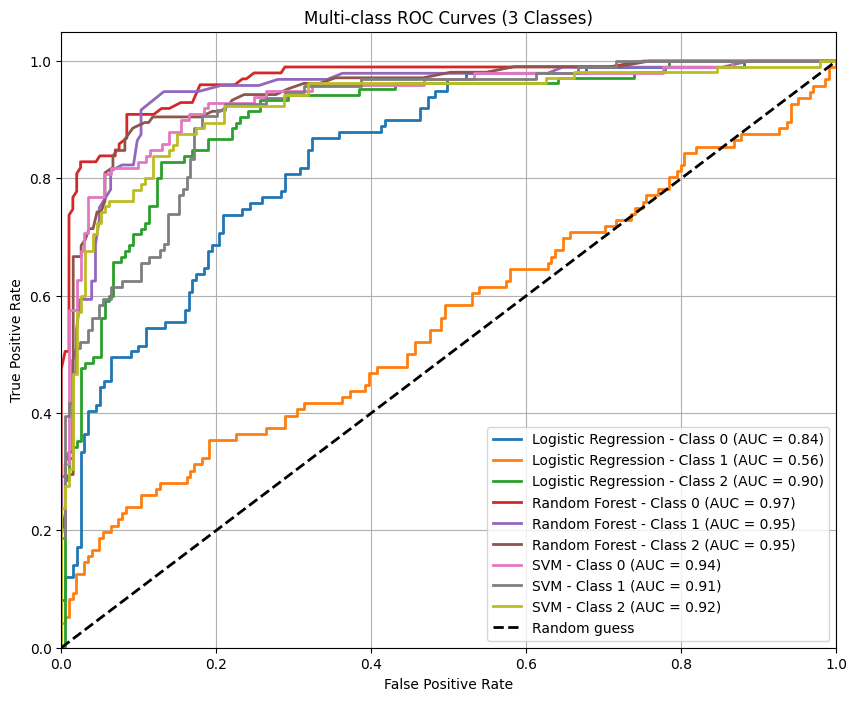

brand_name                   False
model                        False
price                        False
rating                        True
has_5g                       False
has_nfc                      False
has_ir_blaster               False
processor_brand               True
num_cores                     True
processor_speed               True
battery_capacity              True
fast_charging_available      False
fast_charging                 True
ram_capacity                 False
internal_memory              False
screen_size                  False
refresh_rate                 False
resolution                   False
num_rear_cameras             False
num_front_cameras             True
os                            True
primary_camera_rear          False
primary_camera_front          True
extended_memory_available    False
extended_upto                 True
dtype: bool
    brand_name                            model  price  rating  has_5g  \
0      oneplus                    OnePl

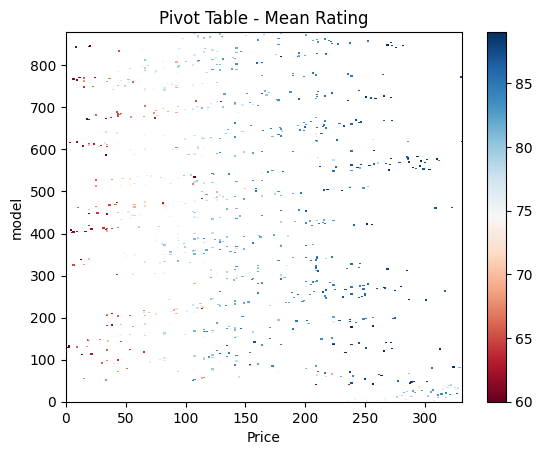

In [59]:
# Membuat dataset sintetis multiclass
# Updated n_informative to satisfy the constraint: n_classes * n_clusters_per_class <= 2**n_informative
# With n_classes=3 and default n_clusters_per_class=2, we need 3 * 2 <= 2**n_informative => 6 <= 2**n_informative
# n_informative = 3 is sufficient (2**3 = 8)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=3, random_state=42)  # Contoh 3 kelas

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to binary format for each class using label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

n_classes = y_test_bin.shape[1] #ambil jumlah kelasnya

# Latih beberapa model
models = [("Logistic Regression", LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')), #gunakan one vs rest
          ("Random Forest", RandomForestClassifier(random_state=42)),
          ("SVM", SVC(probability=True, random_state=42)) # probability=True diperlukan untuk predict_proba
         ]

plt.figure(figsize=(10, 8))  # Ukuran figure yang lebih baik

for name, model in models:
    # Simpan semua hasil fpr, tpr, dan auc untuk setiap kelas dari model saat ini
    fpr_all = dict()
    tpr_all = dict()
    roc_auc_all = dict()

    # Latih model
    model.fit(X_train, y_train)

    # Compute ROC curve and ROC area for each class
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test) #gunakan decision_function jika tidak ada predict_proba

    for i in range(n_classes):
        fpr_all[i], tpr_all[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc_all[i] = auc(fpr_all[i], tpr_all[i])

    # Plot ROC curve untuk setiap kelas
    for i in range(n_classes):
        plt.plot(fpr_all[i], tpr_all[i],
                 label='{0} - Class {1} (AUC = {2:0.2f})'
                       ''.format(name, i, roc_auc_all[i]),
                 lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves ({0} Classes)'.format(n_classes))
plt.legend(loc="lower right")
plt.grid()
plt.show()

df.columns = headers
df.columns

print(df.isnull().any())

print(df.replace(r'^\s*$', np.nan, regex=True))

print(df.describe(include='all'))

grouped_data = df.groupby(['brand_name', 'model'])['price'].mean()

# Changed values to 'rating' and aggfunc to 'mean' assuming the goal is to show average rating
# for each model and price combination. You can change aggfunc based on your specific needs.
pivot_table = pd.pivot_table(df, values='rating', index='model', columns='price', aggfunc='mean')

plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Rating') # Updated title to reflect the aggregated value
plt.xlabel('Price') # Updated xlabel to reflect the column
plt.ylabel('model') # Updated ylabel to reflect the index
plt.show()

In [72]:
#Show Manufacturer vs Screen vs Screen Size showing the price when hover over
# Changed 'Price' to 'price' to match the actual column name
# Correcting the column names in the 'path' argument to match the available columns in the DataFrame
# Changing 'values' from 'model' to 'price' as 'model' is not a numerical column and price is likely intended
fig = px.sunburst(df, path=['brand_name', 'screen_size'], values='price')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [76]:
import plotly.express as px
# Change 'Model Name' to 'model', 'Price' to 'price', and 'CPU' to 'processor_brand'
fig=px.scatter(df, x='brand_name', y='price', color='processor_brand', title='Price & Brand Name')
fig.show()